In [12]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip = zipfile.ZipFile('dogs-vs-cats.zip')
zip.extractall('/content')
zip.close()

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization , Dropout
from keras.models import Sequential


In [6]:
#generators
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
#model

model = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),

    Dense(64, activation='relu'),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history=model.fit(train_ds , validation_data= validation_ds, epochs=10 , batch_size=32)

Epoch 1/10
625/625 [==============================] - 72s 107ms/step - loss: 1.0707 - accuracy: 0.6086 - val_loss: 0.6668 - val_accuracy: 0.6960
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5718 - accuracy: 0.7154 - val_loss: 0.5787 - val_accuracy: 0.7182
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4718 - accuracy: 0.7739 - val_loss: 0.4707 - val_accuracy: 0.7716
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4025 - accuracy: 0.8167 - val_loss: 0.4519 - val_accuracy: 0.7872
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3470 - accuracy: 0.8453 - val_loss: 0.4443 - val_accuracy: 0.7934
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2613 - accuracy: 0.8900 - val_loss: 0.4940 - val_accuracy: 0.8218
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1900 - accuracy: 0.9251 - val_loss: 0.5403 - val_ac

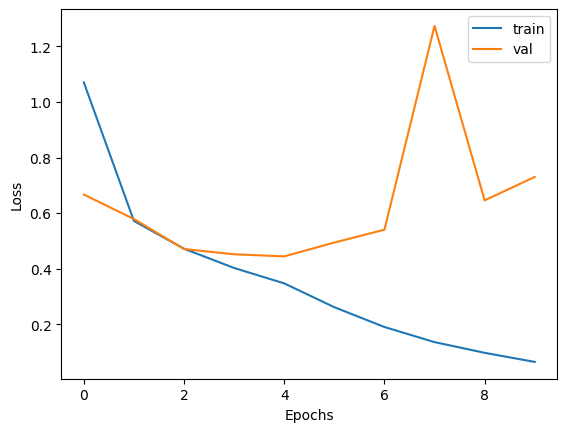

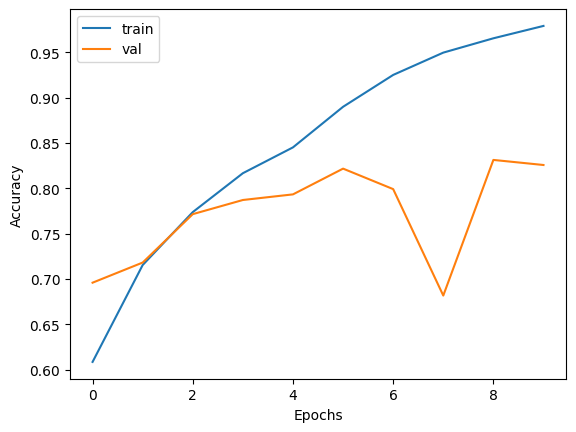

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
import cv2

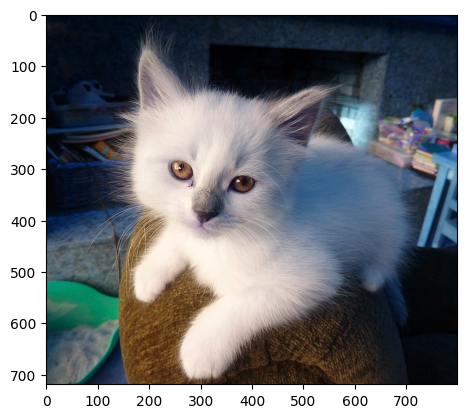

In [33]:
image = cv2.imread('/content/Cat3.jpg')
plt.imshow(image)

In [34]:
image = cv2.resize(image, (256,256))

In [35]:
im_2 = np.reshape(image, [1,256,256,3])

In [36]:
m=model.predict(im_2)
if m>0.5:
  print('dog')
else:
  print('cat')

1/1 [==============================] - 0s 19ms/step
cat


In [37]:
from keras.models import load_model

model.save('cat_vs_dog_10_epochs.keras')